In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

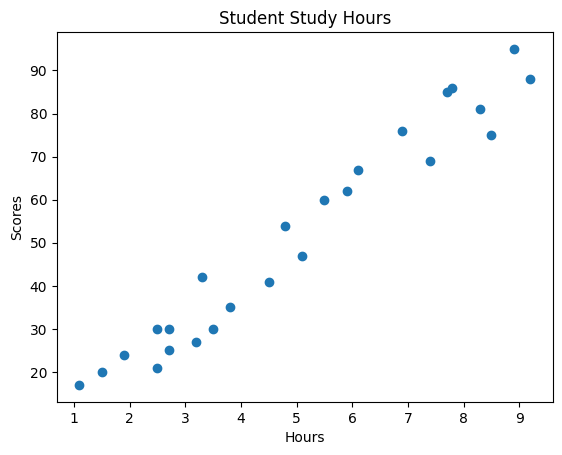

In [2]:
# in this line we initialize and view are data using pandas and matplotlib 

#initialize the data
data = pd.read_csv('data/score.csv')

#assign the x and y coordinates with pandas
x_train = data.Hours
y_train = data.Scores

#visualize the data with matlpotlib
plt.title('Student Study Hours')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(x_train, y_train)


In [3]:
#In this cell, the linear regression model from scratch is written. 
# f(x) = w * x + b or y = m * x + b

#with this function it takes our x_train, weight(w) and bias(b) to compute the linear model   
def linear_regression_model(x, w, b):
    n = len(x) # get the length of our x_train assigned as n 
    y_hat = [0] * n #this line will be our prediction will be stored with default values set to zero for every item in this vector then multiply it to length of our x_train (n) (this is equivalent to np.zeros in numpy)
    
    for i in range(n): #loop to length of x_train
        
        y_hat[i] = w * x[i] + b #the linear regression formula
        
    return y_hat
        

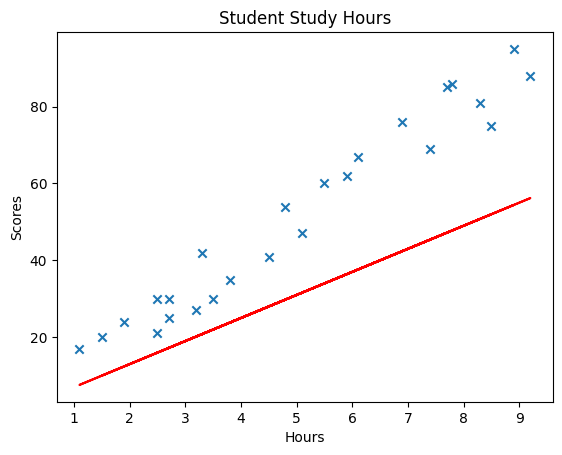

In [4]:
#Now we can tweak our weight and bias to fit our line to our data
weight  = 6
bias = 1 

plt.scatter(x_train, y_train, marker = 'x')
plt.title('Student Study Hours')
plt.xlabel('Hours')
plt.ylabel('Scores')
pred = linear_regression_model(x_train, weight, bias)
plt.plot(x_train, pred, color = 'r')



<h1>Opps! My Line is not will fitted its underfitting, I dont have time to tweak those weight and bias (I purposedly did not fit it so we can code our cost function).

#<h1> To compute our cost function we will use mean squared error image sample below...... </h1>


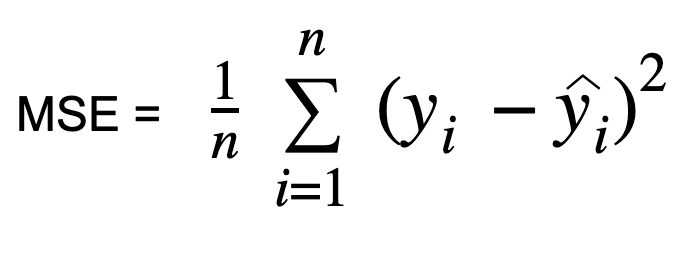

In [5]:
Image("images/linear_reg_mse.png")

In [6]:
def cost_function(x, y, w, b):
    n = len(x)
    cost_sum = 0 # stores the sum of all cost y[i] - y_hat^2
    
    for i in range(n):
        y_hat = w * x[i] + b # the linear equation assigned as y_hat 
        y = y_train[i] #assigning y_train to y to make it cleaner when the cost is written
        cost = (y - y_hat)**2 # the equation on the right side of summation or sigma symbol
        cost_sum += cost # the summation happens
        
    total = 1*(cost)/n #finalizing the total summation we can use the 1/2 squared error to make it look clean when viewing in the graph by multiplying m by two or (2)n but for this we follow the MSE above!
    return total


total: 58.36960000000001


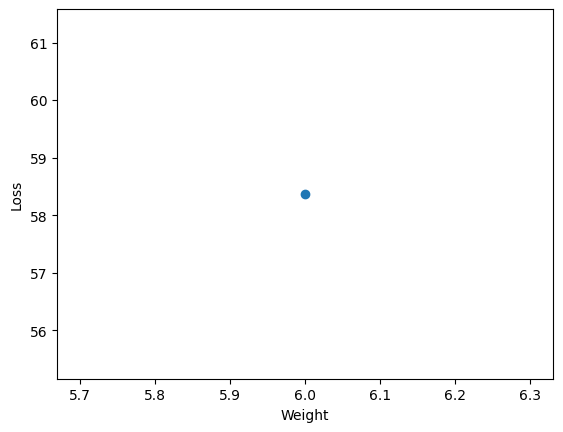

In [7]:
loss = cost_function(x_train, y_train, weight, bias)
plt.ylabel('Loss')
plt.xlabel('Weight')
print('total:', loss)
#visualize the cost_function weight in the x axis and loss is on y axis
plt.scatter(weight, loss)

<h2> Now that we got our cost function with its result we approximately get the total error approximately 58.36960000000001 in total with our weight value using Mean Squared Error formula the Next and Final Step is to build a Gradient descent function to fit our y prediction line in the data plots
    

<h2>This will be our Ultra simplified Gradient Descent formula....</h2>

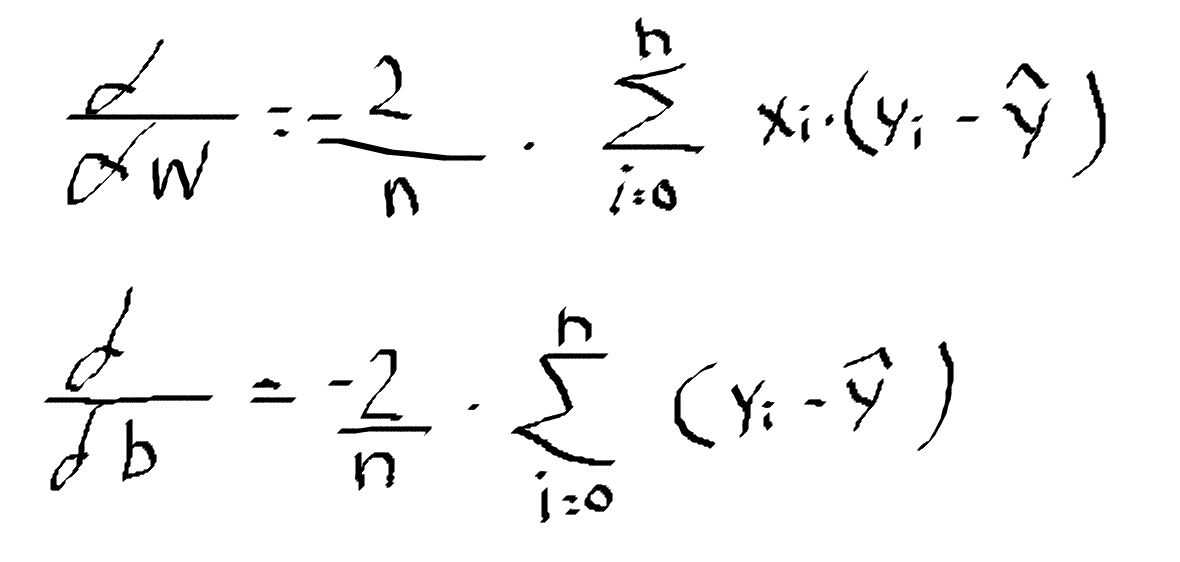

In [8]:
Image('images/linear_reg_gd.png')

In [9]:
def gradient_descent(x, w, b, L):
    n = len(x_train)
    w_gradient = 0
    b_gradient = 0
    
    for i in range(n):
        x = x_train[i]
        y = y_train[i]
        y_hat = w * x + b
        
        w_gradient += -(2/n) * x * (y - y_hat) #this line is the code version of our simplified formula above partial derivative of our cost function with respect to w
        b_gradient += -(2/n) *(y- y_hat) #simplified formula above partial derivative of our cost function with respect to b. Basically the same as w_gradient without x
        
    new_w = w - w_gradient * L #this will get the current weight which is w - w_gradient which is the formula above time the learning rate(L)
    new_b = b - b_gradient * L # get the current bias which is b - b_gradient * learning rate (L)
    
    return new_w, new_b


In [10]:
learning_rate = 0.0001 #making the learning rate larger make it faster but could result to inaccuracy as it tends to descent faster which makes our loss goes to negative or positive and cant find the minimum error 
weight = 0 #re assigning both weight and bias to 0 
bias = 0
epoch = 1000 #the number of how many times the data being passed (tweakable)

for i in range (epoch):
    print('Epoch:{} = weight:{} bias:{} '.format(i, weight, bias))
    weight, bias = gradient_descent(x_train, weight, bias, learning_rate) # unpacking the weight and bias with gradient descent function with new values assigned
    
print("Final result: weight:{} bias:{}".format(weight, bias))

Epoch:0 = weight:0 bias:0 
Epoch:1 = weight:0.06357120000000001 bias:0.010296000000000001 
Epoch:2 = weight:0.126734871174912 bias:0.02052621702912 
Epoch:3 = weight:0.1894936258034921 bias:0.030691072750848446 
Epoch:4 = weight:0.25185005941967625 bias:0.04079098612579286 
Epoch:5 = weight:0.3138067509199154 bias:0.050826373429005416 
Epoch:6 = weight:0.3753662626698223 bias:0.06079764826719749 
Epoch:7 = weight:0.4365311406101352 bias:0.07070522159584382 
Epoch:8 = weight:0.49730391436200166 bias:0.08054950173617705 
Epoch:9 = weight:0.557687097331588 bias:0.09033089439207334 
Epoch:10 = weight:0.6176831868140183 bias:0.10004980266682974 
Epoch:11 = weight:0.6772946640966463 bias:0.109706627079834 
Epoch:12 = weight:0.7365239945616663 bias:0.11930176558312755 
Epoch:13 = weight:0.7953736277880658 bias:0.1288356135778623 
Epoch:14 = weight:0.8538459976529248 bias:0.13830856393065197 
Epoch:15 = weight:0.9119435224320658 bias:0.14772100698981855 
Epoch:16 = weight:0.9696686049000582 bi

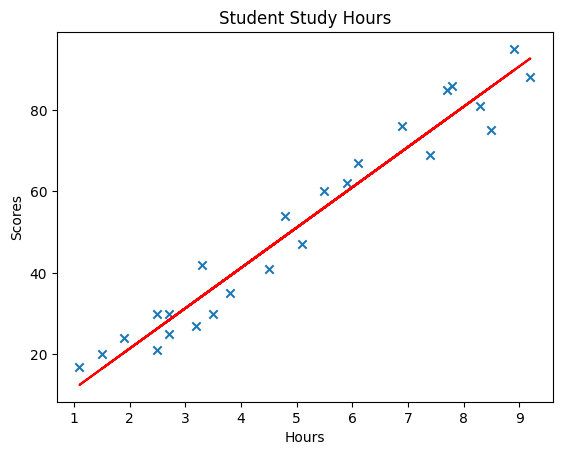

In [11]:
plt.scatter(x_train, y_train, marker ='x')
plt.title('Student Study Hours')
plt.xlabel('Hours')
plt.ylabel('Scores')
gd = linear_regression_model(x_train, weight,bias) #recalling our linear regression model and plug in our new value of weight and bias from gradient descent function
plt.plot(x_train, gd ,color ='r')

<h2> Now that we have the new weight and bias which looks like the line fits the data very well we can now recall our cost function how it is performing from previous error value</h2>

total: 2.0576233095394656


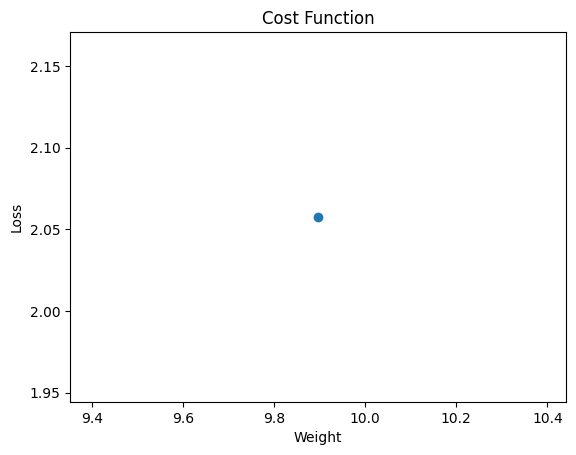

In [12]:
#recalling our cost_function to measure the new loss..
loss2 = cost_function(x_train, y_train, weight, bias)
plt.title('Cost Function')
plt.ylabel('Loss')
plt.xlabel('Weight')
print('total:',loss2)
plt.scatter(weight, loss2)

<h2> Nice! the loss has decreased from 58.36960000000001 to 2.0576233095394656 we cant get to zero because of how the data is scattered/scaled or form but atleast we manage to minimize the loss which is the goal </h2>